Snap through problem -- back of the envelope/intuition

see p22 of this pdf: https://scholar.harvard.edu/files/vasios/files/ArcLength.pdf


Text(0.5, 0, 'applied displacement (m)')

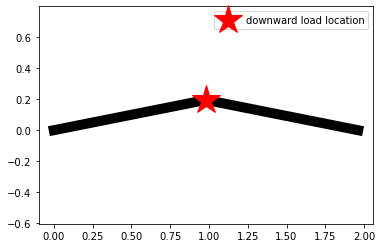

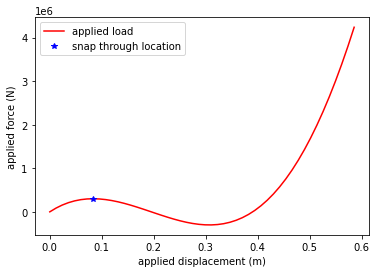

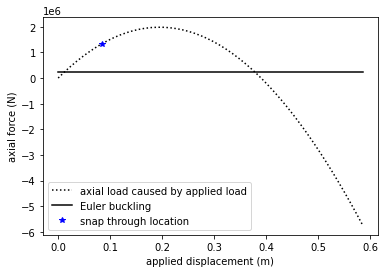

In [75]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
# Use units of kg, m, Pa, s

# Section geometric properties (inputs) 
# https://www.engineeringtoolbox.com/asme-steel-pipes-sizes-d_42.html
# a few schedule 40 options
# nominal 1 " inner diameter = 26.645, and thickness = 3.378
# nominal: 1 1/4 " inner diameter = 35.052, and thickness = 3.556
# nominal: 1 1/2 " inner diameter = 40.894, and thickness = 3.683
# nominal: 2 "  inner diameter = 52.501, and thickness = 3.912
nominal_info = 'nominal_1_5' # ************* CHANGE THIS (label plots)
r1_mm =  40.894/2.0 # mm ******************** CHANGE THIS ************
r2_mm = 40.894/2.0 + 3.683 # mm ************ CHANGE THIS ************
r1 = r1_mm / 1000 # m
r2 = r2_mm / 1000 # m 
A = np.pi*r2**2.0 - np.pi*r1**2.0 # m^2
I = np.pi*r2**4.0/4.0 - np.pi*r1**4.0/4.0 # m^4

# define the length of the section
L_0 = 1 # m
theta_0 = np.pi/16.0 # radians

# section material properties 
E_steel_GPa = 200 # GPa
E = E_steel_GPa * 10**9.0 # Pa 
sigma_yield_steel_MPa = 350 # MPa
sy = sigma_yield_steel_MPa * 10**6.0 #Pa

# compute yield force for the section
P_yield = E * A

# compute Euler buckling for the section
k = 1
P_euler = np.pi ** 2.0 * E * I / (k * L_0 ) ** 2.0 

# compute snap through 
u = np.linspace(0,3.0*np.sin(theta_0)*L_0)
L = np.sqrt((L_0*np.cos(theta_0))**2.0 + (L_0*np.sin(theta_0) - u)**2.0)
theta = np.arctan((L_0*np.sin(theta_0)-u)/(L_0*np.cos(theta_0)))
P_axial = -1.0*E*A*(L-L_0)/L_0
P_applied = -2.0*np.sin(theta)*E*A*(L-L_0)/L_0

peaks, _ = find_peaks(P_applied)
u_snap_through = u[peaks[0]]
P_applied_snap_through = P_applied[peaks[0]]
P_axial_snap_through = P_axial[peaks[0]]

# plot geometry 
plt.figure()
plt.plot([0,np.cos(theta_0)*L_0,2.0*np.cos(theta_0)*L_0],[0,np.sin(theta_0)*L_0,0],'k-',linewidth=10)
plt.plot(np.cos(theta_0)*L_0, np.sin(theta_0)*L_0,'r*',markersize=30,label='downward load location')
plt.legend()
plt.axis('equal')

# plot forces
plt.figure()
plt.plot(u,P_applied,'r',label='applied load')
plt.plot(u_snap_through,P_applied_snap_through,'b*',label='snap through location')
plt.legend()
plt.ylabel('applied force (N)'); plt.xlabel('applied displacement (m)')

# plot forces
plt.figure()
plt.plot(u,P_axial,'k:',label='axial load caused by applied load')
#plt.plot(u,P_applied,'r',label='applied load')
plt.plot(u,np.ones(u.shape[0])*P_euler,'k-',label='Euler buckling')
plt.plot(u_snap_through,P_axial_snap_through,'b*',label='snap through location')
#plt.plot(u,np.ones(u.shape[0])*P_yield,'c-.',label='section yield')
plt.legend()
plt.ylabel('axial force (N)'); plt.xlabel('applied displacement (m)')